In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
'''Read Excel file for pertinent sheet and serialize the data
        NO NEED TO RUN THIS CODE AFTER SERIALIZATION'''
'''
#EIA923: Fuel Receipts and Costs Sheet 2018
data = pd.read_excel('/home/alan/Desktop/Civil_Engineering/Thesis_Research/f923_2018er/EIA923_Schedules_2_3_4_5_M_12_2018_Early_Release.xlsx'
,sheet_name='Page 5 Fuel Receipts and Costs',index_col=None,header=5)

df = pd.DataFrame(data)
df=df[df['ENERGY_SOURCE']=='NG'] #extract only natural gas-fired plants
df.to_pickle('/home/alan/Desktop/Civil_Engineering/Thesis_Research/f923_2018er/FuelReceiptsandCosts.pkl')
'''

'''
#EIA923: Boiler Fuel Data Sheet 2018
data = pd.read_excel('/home/alan/Desktop/Civil_Engineering/Thesis_Research/f923_2018er/EIA923_Schedules_2_3_4_5_M_12_2018_Early_Release.xlsx'
,sheet_name='Page 3 Boiler Fuel Data',index_col=None,header=0)

df = pd.DataFrame(data)
df=df[df['Reported\nFuel Type Code']=='NG'] #extract only natural gas-fired plants
df.to_pickle('/home/alan/Desktop/Civil_Engineering/Thesis_Research/f923_2018er/BoilerFuelData_NG.pkl')
'''

"\n#EIA923: Boiler Fuel Data Sheet\ndata = pd.read_excel('/home/alan/Desktop/Civil_Engineering/Thesis_Research/f923_2018er/EIA923_Schedules_2_3_4_5_M_12_2018_Early_Release.xlsx'\n,sheet_name='Page 3 Boiler Fuel Data',index_col=None,header=0)\n\ndf = pd.DataFrame(data)\ndf=df[df['Reported\nFuel Type Code']=='NG'] #extract only natural gas-fired plants\ndf.to_pickle('/home/alan/Desktop/Civil_Engineering/Thesis_Research/f923_2018er/BoilerFuelData_NG.pkl')\n"

In [3]:
'''Read DataFrames into memory'''
#df=pd.read_pickle('/home/alan/Desktop/Civil_Engineering/Thesis_Research/f923_2018er/BoilerFuelData.pkl')
NG_Receipts_df=pd.read_pickle('/home/alan/Desktop/Civil_Engineering/Thesis_Research/f923_2018er/FuelReceiptsandCosts.pkl')
NG_Boiler_df=pd.read_pickle('/home/alan/Desktop/Civil_Engineering/Thesis_Research/f923_2018er/BoilerFuelData_NG.pkl')

In [4]:
cols = NG_Boiler_df.columns.values
Interest_Cols = [cols[5],cols[15],cols[16],cols[17],cols[18],cols[19],cols[20],cols[21],cols[22],cols[23],cols[24],cols[25],cols[26]]
NG_Consumed = NG_Boiler_df[Interest_Cols]
NG_Consumed.replace('.',np.nan,inplace=True)

/home/alan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [5]:
NG_Consumed_Monthly = NG_Consumed.groupby(['Plant State'],)[Interest_Cols[1:]].sum().reset_index()

In [6]:
StateGroups = NG_Receipts_df.groupby(['Plant State','MONTH'],)['QUANTITY'].sum().reset_index(name='PURCHASED_QUANTITY')

In [7]:
states = NG_Receipts_df['Plant State'].unique()
mnth = NG_Receipts_df['MONTH'].unique()

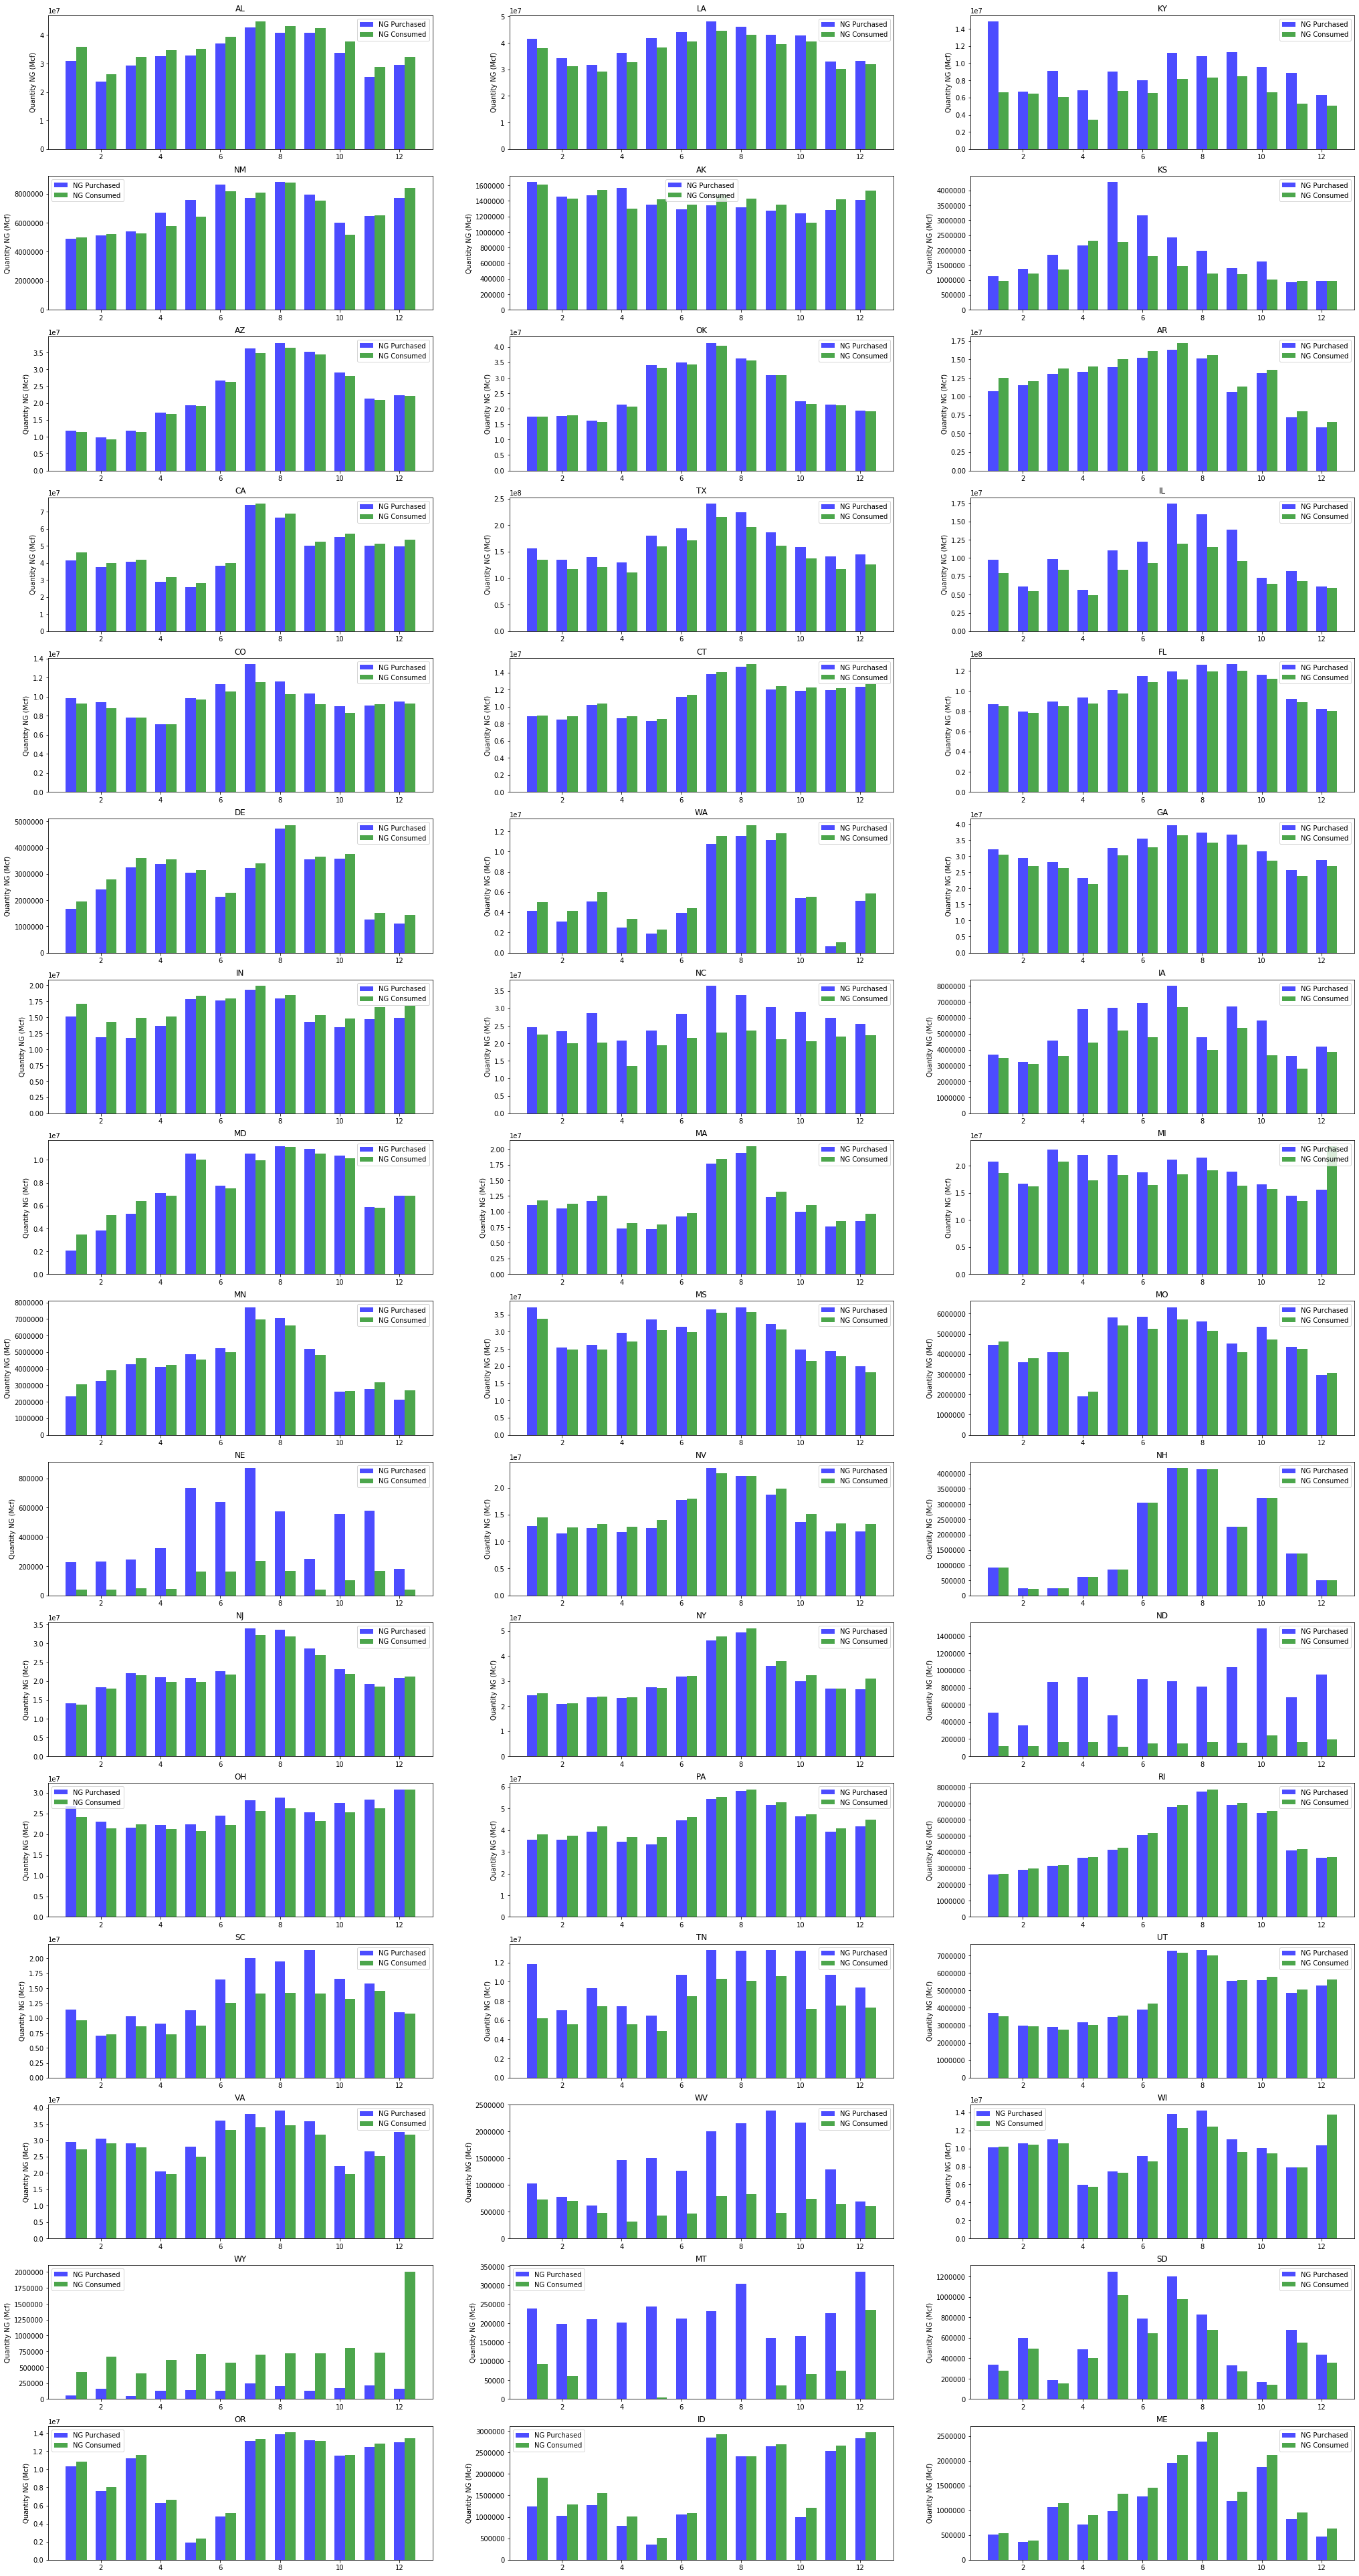

In [8]:
fig = plt.figure(figsize=(35,70))
fig.tight_layout()
bar_width = 0.35
opacity = 0.7
j=0

for i in states:
    j=j+1
    ax = fig.add_subplot(16, 3, j)
    ax.set_ylabel('Quantity NG (Mcf)')
    ax.set_title(str(i))
    #graph quantity purchased
    bar1 = plt.bar(mnth,
                   StateGroups[StateGroups['Plant State']==i]['PURCHASED_QUANTITY'].values,
                   bar_width,
                   color='b',
                  label='NG Purchased',
                  alpha=opacity)
    
    #graph quantity consumed
    Quantity_Consumed = NG_Consumed_Monthly[NG_Consumed_Monthly['Plant State']==i].values
    bar2 = plt.bar(mnth + bar_width,
                   NG_Consumed_Monthly[NG_Consumed_Monthly['Plant State']==i].values[0][1:],
                   bar_width,
                   color='g',
                  label='NG Consumed',
                  alpha=opacity)
    plt.legend()

In [9]:
'''List Natural Gas Suppliers and their quantity supplied'''


'List Natural Gas Suppliers and their quantity supplied'

In [10]:
Suppliers=NG_Receipts_df.groupby('SUPPLIER')['QUANTITY'].sum().reset_index(name='SUPPLIED_QUANTITY')

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420,

[Text(0, 0, 'ACADIA PIPELINE PARTNERS'),
 Text(0, 0, 'AGGREGATE'),
 Text(0, 0, 'ALGONQUIN GAS TRANSMISSION'),
 Text(0, 0, 'ALLIANT ENERGY'),
 Text(0, 0, 'ALTN PIPELINE'),
 Text(0, 0, 'AMEREN CILCO'),
 Text(0, 0, 'AMEREN CIPS'),
 Text(0, 0, 'AMERICAN MIDSTREAM'),
 Text(0, 0, 'AMERIKOHL'),
 Text(0, 0, 'ANADARKO'),
 Text(0, 0, 'ANAHAU ENERGY'),
 Text(0, 0, 'ANR'),
 Text(0, 0, 'APACHE'),
 Text(0, 0, 'ARIZONA PUBLIC SERVICE'),
 Text(0, 0, 'ARMSTRONG COAL'),
 Text(0, 0, 'ASCENT RESOURCES - UTICA, LLC'),
 Text(0, 0, 'ATMOS ENERGY'),
 Text(0, 0, 'ATMOS PIPELINE'),
 Text(0, 0, 'AUTOMATED PETROLEUM & ENERGY'),
 Text(0, 0, 'AVISTA'),
 Text(0, 0, 'B P CANADA'),
 Text(0, 0, 'BENTON COUNTY'),
 Text(0, 0, 'BG ENERGY'),
 Text(0, 0, 'BGE'),
 Text(0, 0, 'BIOURJA'),
 Text(0, 0, 'BLACK HILLS ENERGY'),
 Text(0, 0, 'BP'),
 Text(0, 0, 'BP CANADA ENERGY COMPANY'),
 Text(0, 0, 'BP CANADA ENERGY MARKETING'),
 Text(0, 0, 'BP NORTH AMERICA'),
 Text(0, 0, 'BRIDGELINE'),
 Text(0, 0, 'BRITISH PETROLEUM'),
 Text(0, 0

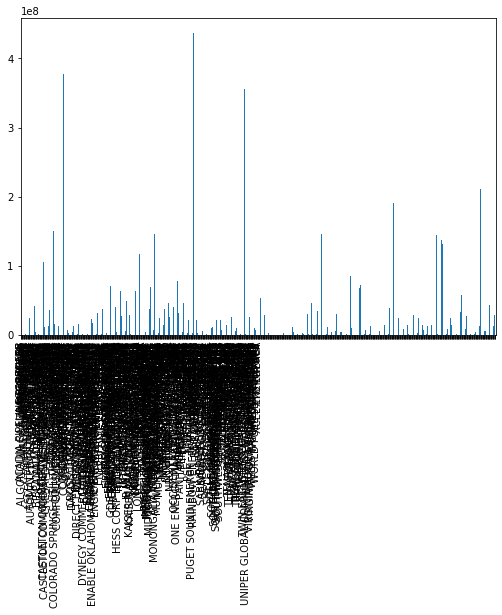

In [106]:
N = len(Suppliers[Suppliers['SUPPLIER']!='VARIOUS (NATURAL GAS SPOT PURCHASES ONLY)']['SUPPLIER'].values)
bar_plot = Suppliers[Suppliers['SUPPLIER']!='VARIOUS (NATURAL GAS SPOT PURCHASES ONLY)']

pos = [i*2 for i in range(N)]
tots_tix = [i for i in range(max(pos))]
print(pos)
width = 1

fig = plt.figure()
ax = fig.add_axes([1,1,1.1,1.1])
ax.bar(pos,bar_plot['SUPPLIED_QUANTITY'].values)
ax.set_xlim(0,max(pos))
ax.set_xticks(range(max(pos)))
ax.set_xticklabels(bar_plot['SUPPLIER'].values,rotation=90)